In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.7f}'.format
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# central
df = pd.read_csv('central.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            165 non-null    object 
 1   MSOA            165 non-null    object 
 2   housing_price   165 non-null    int64  
 3   mean_income     165 non-null    int64  
 4   population      165 non-null    int64  
 5   fertility_rate  165 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.9+ KB


In [4]:
df.head()

,CODE,MSOA,housing_price,mean_income,population,fertility_rate
0,E02000001,City of London 001,894046,79700,8072,37.9000000
1,E02000166,Camden 001,1013792,55000,8238,39.3000000
2,E02000167,Camden 002,1782611,81600,8251,64.1000000
3,E02000168,Camden 003,893129,58100,8781,47.4000000
4,E02000169,Camden 004,1596253,75900,8555,67.1000000


In [5]:
df.describe()

,housing_price,mean_income,population,fertility_rate
count,165.0000000,165.0000000,165.0000000,165.0000000
mean,"895,095.9333333","54,863.6363636","8,934.4484848",60.3600000
std,"677,021.8850874","12,498.1027385","1,418.4661219",16.5888620
min,"281,046.0000000","35,800.0000000","5,832.0000000",15.5000000
25%,"468,128.0000000","45,200.0000000","8,115.0000000",49.2000000
50%,"650,081.0000000","52,600.0000000","8,862.0000000",59.5000000
75%,"1,105,235.0000000","62,900.0000000","9,571.0000000",70.4000000
max,"5,257,978.0000000","93,800.0000000","15,274.0000000",107.9000000


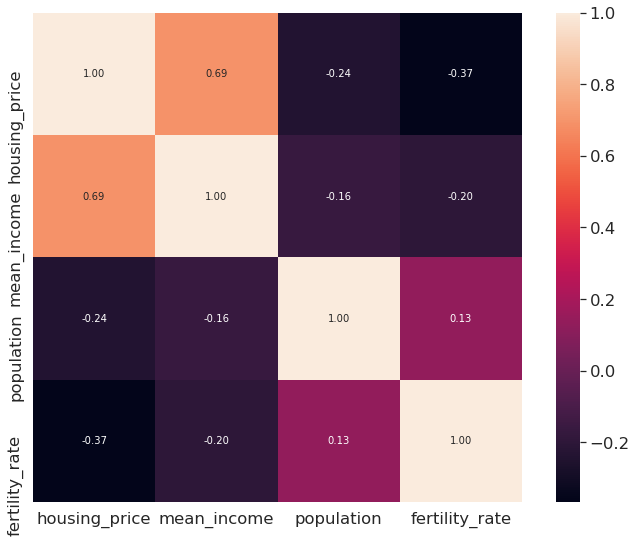

In [6]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df.corrwith(df.housing_price)

housing_price                                   1.0000000
mean_income                                     0.6913881
population                                     -0.2431399
fertility_rate                                 -0.3664023
dtype: float64

In [8]:
# forward selection
df_1 = df.loc[:,['housing_price', 'mean_income']]

model_1 = sm.formula.ols('housing_price ~ mean_income', df_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           8.74e-25
Time:                        12:22:55   Log-Likelihood:                -2395.2
No. Observations:                 165   AIC:                             4794.
Df Residuals:                     163   BIC:                             4801.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.16e+06   1.72e+05     -6.724      0.000    -1.5e+06   -8.19e+05
mean_income    37.4525      3.065     12.218      0.000      31.399      43.506
==============================================================================
Omnibus:                       91.646   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.375
Skew:                           1.989   Prob(JB):                    1.53e-121
Kurtosis:                      11.068   Cond. No.                     2.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df_2 = df.loc[:,['housing_price', 'population']]

model_2 = sm.formula.ols('housing_price ~ population', df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.24
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00165
Time:                        12:22:56   Log-Likelihood:                -2443.8
No. Observations:                 165   AIC:                             4892.
Df Residuals:                     163   BIC:                             4898.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.932e+06   3.28e+05      5.890      0.000    1.28e+06    2.58e+06
population  -116.0486     36.263     -3.200      0.002    -187.653     -44.444
==============================================================================
Omnibus:                      126.094   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1356.964
Skew:                           2.739   Prob(JB):                    2.18e-295
Kurtosis:                      15.937   Cond. No.                     5.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df_3 = df.loc[:,['housing_price', 'fertility_rate']]

model_3 = sm.formula.ols('housing_price ~ fertility_rate', df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     25.28
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.30e-06
Time:                        12:22:57   Log-Likelihood:                -2436.9
No. Observations:                 165   AIC:                             4878.
Df Residuals:                     163   BIC:                             4884.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.798e+06   1.86e+05      9.657      0.000    1.43e+06    2.17e+06
fertility_rate -1.495e+04   2974.325     -5.028      0.000   -2.08e+04   -9080.376
==============================================================================
Omnibus:                      107.019   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.241
Skew:                           2.390   Prob(JB):                    4.00e-157
Kurtosis:                      12.051   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df_4 = df.loc[:,['housing_price', 'mean_income','population']]

model_4 = sm.formula.ols('housing_price ~ mean_income + population', df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     79.46
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           8.98e-25
Time:                        12:22:57   Log-Likelihood:                -2392.4
No. Observations:                 165   AIC:                             4791.
Df Residuals:                     162   BIC:                             4800.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.281e+05   3.18e+05     -1.659      0.099   -1.16e+06       1e+05
mean_income    36.2670      3.066     11.830      0.000      30.213      42.321
population    -63.4095     27.013     -2.347      0.020    -116.751     -10.067
==============================================================================
Omnibus:                      101.877   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.101
Skew:                           2.160   Prob(JB):                    1.82e-174
Kurtosis:                      12.886   Cond. No.                     4.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
df_5 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_5 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     91.78
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.24e-27
Time:                        12:22:58   Log-Likelihood:                -2386.3
No. Observations:                 165   AIC:                             4779.
Df Residuals:                     162   BIC:                             4788.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.371e+05   2.35e+05     -1.859      0.065   -9.01e+05    2.72e+04
mean_income       34.8577      2.976     11.712      0.000      28.980      40.735
fertility_rate -9612.6396   2242.305     -4.287      0.000    -1.4e+04   -5184.725
==============================================================================
Omnibus:                       85.066   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.340
Skew:                           1.822   Prob(JB):                    6.12e-109
Kurtosis:                      10.694   Cond. No.                     3.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
df_6 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_6 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     63.73
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.24e-27
Time:                        12:22:59   Log-Likelihood:                -2384.2
No. Observations:                 165   AIC:                             4776.
Df Residuals:                     161   BIC:                             4789.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.137e+04   3.35e+05      0.153      0.878    -6.1e+05    7.13e+05
mean_income       34.0004      2.978     11.416      0.000      28.119      39.882
fertility_rate -9149.4591   2232.824     -4.098      0.000   -1.36e+04   -4740.061
population       -52.5385     25.921     -2.027      0.044    -103.728      -1.349
==============================================================================
Omnibus:                       94.824   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.053
Skew:                           1.993   Prob(JB):                    5.28e-151
Kurtosis:                      12.208   Cond. No.                     5.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df_final1 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_final1 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_final1).fit()
model_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     63.73
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.24e-27
Time:                        12:38:36   Log-Likelihood:                -2384.2
No. Observations:                 165   AIC:                             4776.
Df Residuals:                     161   BIC:                             4789.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.137e+04   3.35e+05      0.153      0.878    -6.1e+05    7.13e+05
mean_income       34.0004      2.978     11.416      0.000      28.119      39.882
fertility_rate -9149.4591   2232.824     -4.098      0.000   -1.36e+04   -4740.061
population       -52.5385     25.921     -2.027      0.044    -103.728      -1.349
==============================================================================
Omnibus:                       94.824   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.053
Skew:                           1.993   Prob(JB):                    5.28e-151
Kurtosis:                      12.208   Cond. No.                     5.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# backward selection
df_7 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_7 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_7).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     63.73
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.24e-27
Time:                        12:38:39   Log-Likelihood:                -2384.2
No. Observations:                 165   AIC:                             4776.
Df Residuals:                     161   BIC:                             4789.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.137e+04   3.35e+05      0.153      0.878    -6.1e+05    7.13e+05
mean_income       34.0004      2.978     11.416      0.000      28.119      39.882
fertility_rate -9149.4591   2232.824     -4.098      0.000   -1.36e+04   -4740.061
population       -52.5385     25.921     -2.027      0.044    -103.728      -1.349
==============================================================================
Omnibus:                       94.824   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.053
Skew:                           1.993   Prob(JB):                    5.28e-151
Kurtosis:                      12.208   Cond. No.                     5.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
df_final2 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_final2 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_final2).fit()
model_final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     63.73
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.24e-27
Time:                        12:38:40   Log-Likelihood:                -2384.2
No. Observations:                 165   AIC:                             4776.
Df Residuals:                     161   BIC:                             4789.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.137e+04   3.35e+05      0.153      0.878    -6.1e+05    7.13e+05
mean_income       34.0004      2.978     11.416      0.000      28.119      39.882
fertility_rate -9149.4591   2232.824     -4.098      0.000   -1.36e+04   -4740.061
population       -52.5385     25.921     -2.027      0.044    -103.728      -1.349
==============================================================================
Omnibus:                       94.824   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.053
Skew:                           1.993   Prob(JB):                    5.28e-151
Kurtosis:                      12.208   Cond. No.                     5.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [18]:
df_final2 = drop_column_using_vif_(df_final2.drop('housing_price', axis=1))

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


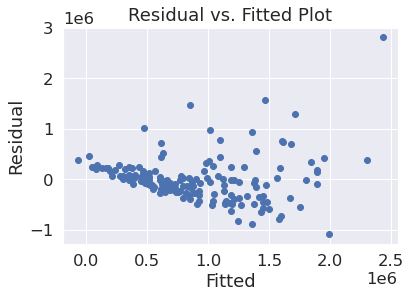

In [19]:
# plot 
plt.scatter(model_final2.fittedvalues, model_final2.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

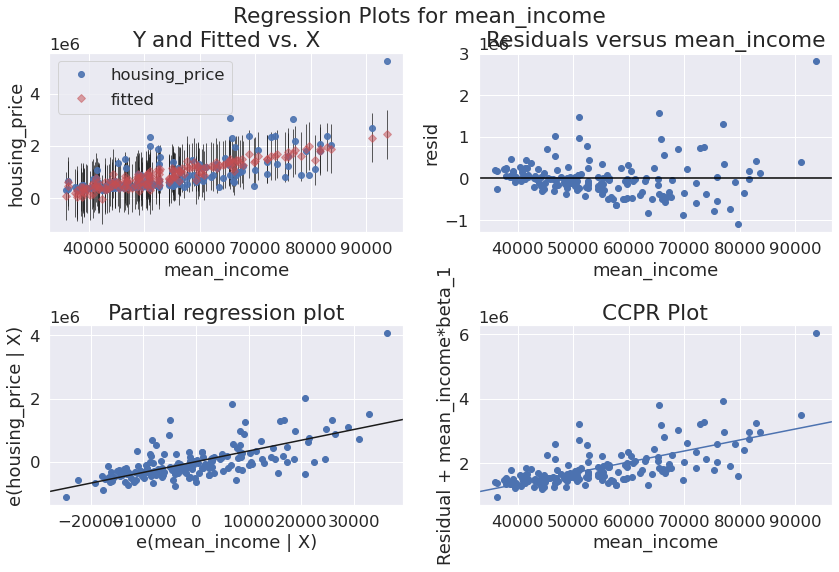

In [20]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'mean_income', fig=fig)

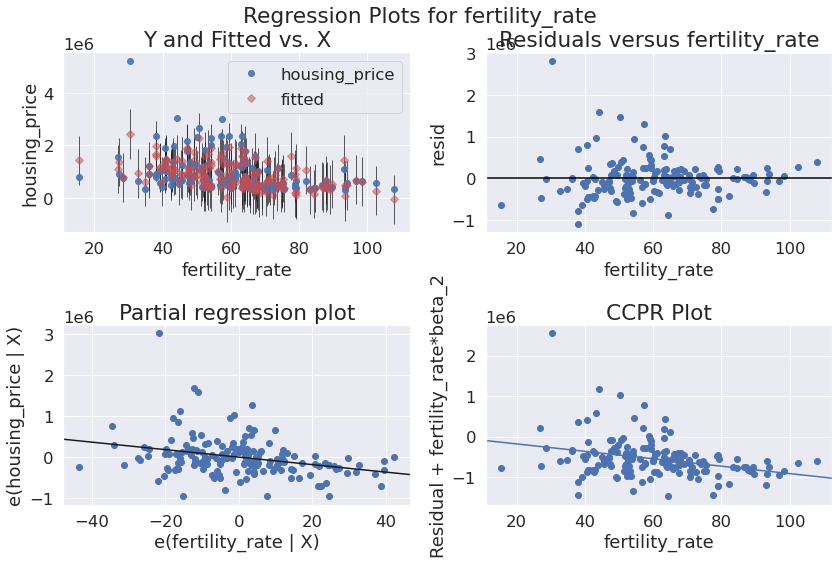

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'fertility_rate', fig=fig)

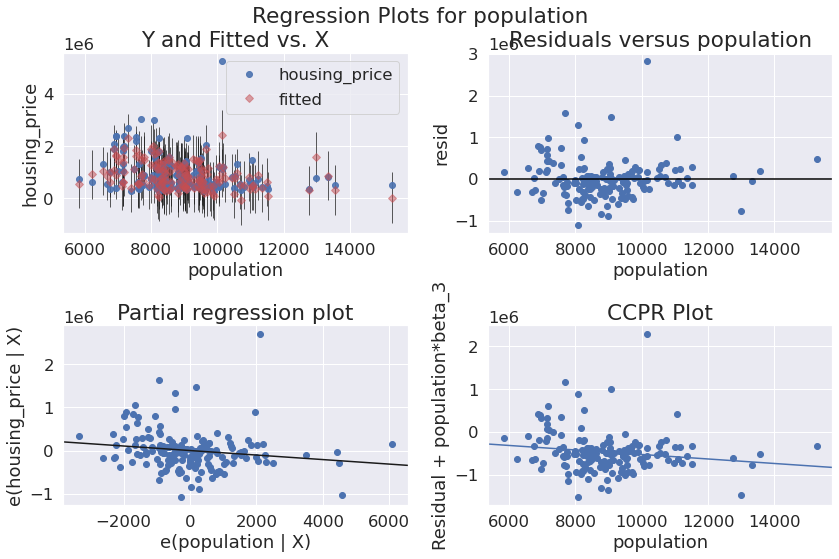

In [22]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'population', fig=fig)

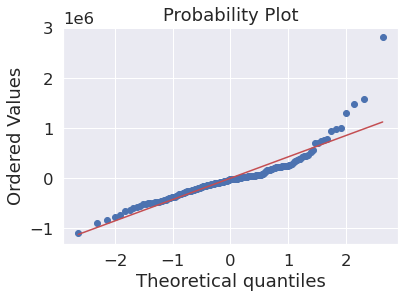

In [23]:
resid = model_final2.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

In [24]:
# east
df = pd.read_csv('east.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            305 non-null    object 
 1   MSOA            305 non-null    object 
 2   housing_price   305 non-null    int64  
 3   mean_income     305 non-null    int64  
 4   population      305 non-null    int64  
 5   fertility_rate  305 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 14.4+ KB


In [26]:
df.head()

,CODE,MSOA,housing_price,mean_income,population,fertility_rate
0,E02000895,Waltham Forest 001,341992,44600,8035,62.6000000
1,E02000896,Waltham Forest 002,360679,51300,8936,75.3000000
2,E02000897,Waltham Forest 003,314504,46100,8386,94.6000000
3,E02000898,Waltham Forest 004,318244,48200,7861,68.2000000
4,E02000899,Waltham Forest 005,334042,46600,8185,71.9000000


In [27]:
df.describe()

,housing_price,mean_income,population,fertility_rate
count,305.0000000,305.0000000,305.0000000,305.0000000
mean,"331,654.3147541","46,480.6557377","8,778.0524590",81.2501639
std,"110,630.5257540","8,384.3400136","1,871.7915700",22.6673718
min,"160,391.0000000","33,300.0000000","5,566.0000000",24.0000000
25%,"246,884.0000000","40,300.0000000","7,506.0000000",65.8000000
50%,"306,734.0000000","45,300.0000000","8,471.0000000",79.3000000
75%,"381,240.0000000","50,800.0000000","9,689.0000000",95.5000000
max,"804,190.0000000","105,700.0000000","15,867.0000000",174.8000000


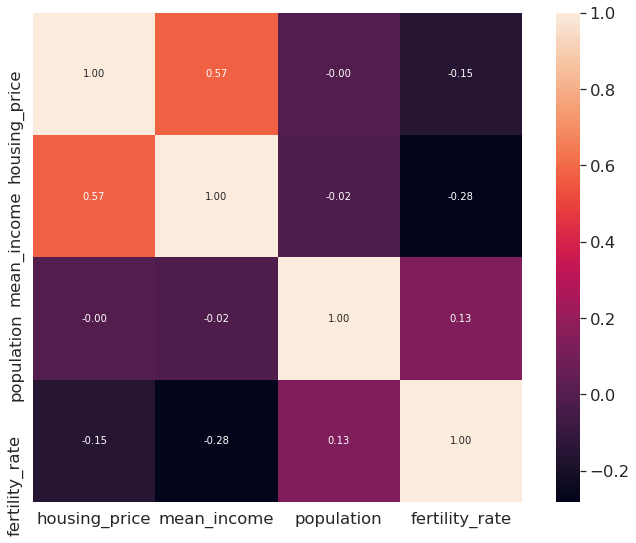

In [28]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [29]:
df.corrwith(df.housing_price)

housing_price                                   1.0000000
mean_income                                     0.5738962
population                                     -0.0022239
fertility_rate                                 -0.1484140
dtype: float64

In [30]:
# forward selection
df_8 = df.loc[:,['housing_price', 'mean_income']]

model_8 = sm.formula.ols('housing_price ~ mean_income', df_8).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.10e-28
Time:                        12:39:19   Log-Likelihood:                -3913.6
No. Observations:                 305   AIC:                             7831.
Df Residuals:                     303   BIC:                             7839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.032e+04   2.93e+04     -0.693      0.489    -7.8e+04    3.74e+04
mean_income     7.5725      0.621     12.199      0.000       6.351       8.794
==============================================================================
Omnibus:                       64.170   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.769
Skew:                           1.217   Prob(JB):                     1.78e-23
Kurtosis:                       4.524   Cond. No.                     2.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df_9 = df.loc[:,['housing_price', 'population']]

model_9 = sm.formula.ols('housing_price ~ population', df_9).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001499
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.969
Time:                        12:39:20   Log-Likelihood:                -3974.5
No. Observations:                 305   AIC:                             7953.
Df Residuals:                     303   BIC:                             7961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.328e+05   3.05e+04     10.921      0.000    2.73e+05    3.93e+05
population    -0.1314      3.395     -0.039      0.969      -6.813       6.550
==============================================================================
Omnibus:                       66.065   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.888
Skew:                           1.238   Prob(JB):                     1.37e-24
Kurtosis:                       4.586   Cond. No.                     4.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df_10 = df.loc[:,['housing_price', 'fertility_rate']]

model_10 = sm.formula.ols('housing_price ~ fertility_rate', df_10).fit()
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     6.824
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00944
Time:                        12:39:21   Log-Likelihood:                -3971.1
No. Observations:                 305   AIC:                             7946.
Df Residuals:                     303   BIC:                             7954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.905e+05   2.34e+04     16.698      0.000    3.44e+05    4.37e+05
fertility_rate  -724.3503    277.278     -2.612      0.009   -1269.985    -178.715
==============================================================================
Omnibus:                       66.762   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.898
Skew:                           1.254   Prob(JB):                     8.30e-25
Kurtosis:                       4.561   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
df_11 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_11 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_11).fit()
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     74.22
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.06e-27
Time:                        12:39:22   Log-Likelihood:                -3913.6
No. Observations:                 305   AIC:                             7833.
Df Residuals:                     302   BIC:                             7844.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.836e+04   4.05e+04     -0.700      0.485   -1.08e+05    5.14e+04
mean_income        7.6249      0.648     11.769      0.000       6.350       8.900
fertility_rate    68.9620    239.637      0.288      0.774    -402.609     540.533
==============================================================================
Omnibus:                       64.777   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.587
Skew:                           1.222   Prob(JB):                     7.16e-24
Kurtosis:                       4.554   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
df_final3 = df.loc[:,['housing_price', 'mean_income']]

model_final3 = sm.formula.ols('housing_price ~ mean_income', df_final3).fit()
model_final3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.10e-28
Time:                        12:39:23   Log-Likelihood:                -3913.6
No. Observations:                 305   AIC:                             7831.
Df Residuals:                     303   BIC:                             7839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.032e+04   2.93e+04     -0.693      0.489    -7.8e+04    3.74e+04
mean_income     7.5725      0.621     12.199      0.000       6.351       8.794
==============================================================================
Omnibus:                       64.170   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.769
Skew:                           1.217   Prob(JB):                     1.78e-23
Kurtosis:                       4.524   Cond. No.                     2.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# backward selection
df_12 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_12 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_12).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     74.22
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.06e-27
Time:                        12:39:24   Log-Likelihood:                -3913.6
No. Observations:                 305   AIC:                             7833.
Df Residuals:                     302   BIC:                             7844.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.836e+04   4.05e+04     -0.700      0.485   -1.08e+05    5.14e+04
mean_income        7.6249      0.648     11.769      0.000       6.350       8.900
fertility_rate    68.9620    239.637      0.288      0.774    -402.609     540.533
==============================================================================
Omnibus:                       64.777   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.587
Skew:                           1.222   Prob(JB):                     7.16e-24
Kurtosis:                       4.554   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
df_13 = df.loc[:,['housing_price', 'mean_income']]

model_13 = sm.formula.ols('housing_price ~ mean_income', df_13).fit()
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.10e-28
Time:                        12:39:24   Log-Likelihood:                -3913.6
No. Observations:                 305   AIC:                             7831.
Df Residuals:                     303   BIC:                             7839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.032e+04   2.93e+04     -0.693      0.489    -7.8e+04    3.74e+04
mean_income     7.5725      0.621     12.199      0.000       6.351       8.794
==============================================================================
Omnibus:                       64.170   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.769
Skew:                           1.217   Prob(JB):                     1.78e-23
Kurtosis:                       4.524   Cond. No.                     2.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
df_final4 = df.loc[:,['housing_price', 'mean_income']]

model_final4 = sm.formula.ols('housing_price ~ mean_income', df_final4).fit()
model_final4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.10e-28
Time:                        12:39:25   Log-Likelihood:                -3913.6
No. Observations:                 305   AIC:                             7831.
Df Residuals:                     303   BIC:                             7839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.032e+04   2.93e+04     -0.693      0.489    -7.8e+04    3.74e+04
mean_income     7.5725      0.621     12.199      0.000       6.351       8.794
==============================================================================
Omnibus:                       64.170   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.769
Skew:                           1.217   Prob(JB):                     1.78e-23
Kurtosis:                       4.524   Cond. No.                     2.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [39]:
df_final4 = drop_column_using_vif_(df_final4.drop('housing_price', axis=1))

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


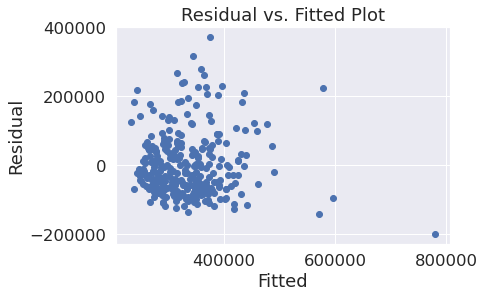

In [40]:
# plot 
plt.scatter(model_final4.fittedvalues, model_final4.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

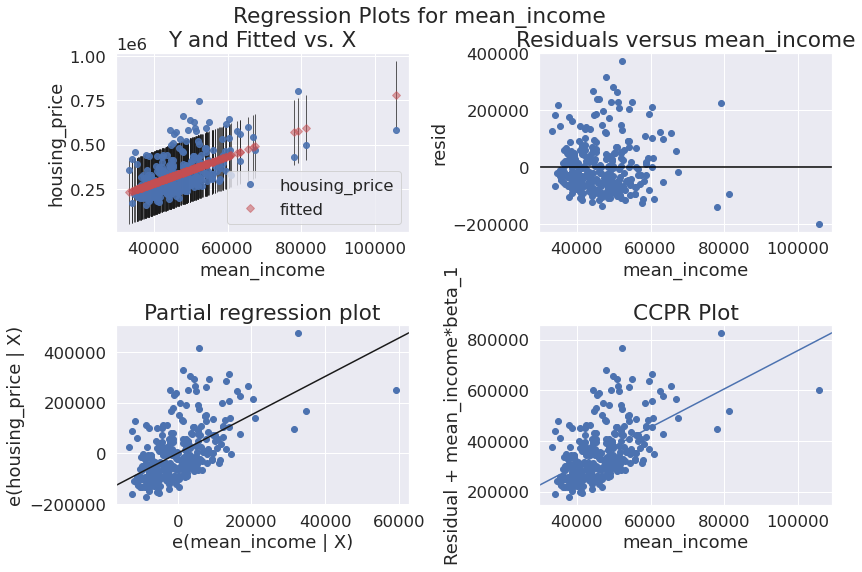

In [41]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final4, 'mean_income', fig=fig)

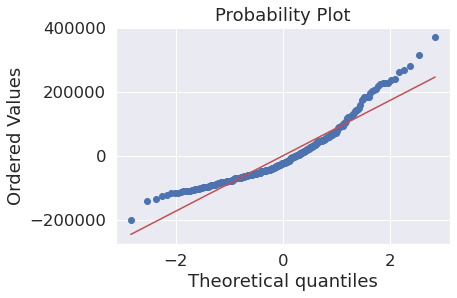

In [42]:
resid = model_final4.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

In [43]:
# south
df = pd.read_csv('south.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            189 non-null    object 
 1   MSOA            189 non-null    object 
 2   housing_price   189 non-null    int64  
 3   mean_income     189 non-null    int64  
 4   population      189 non-null    int64  
 5   fertility_rate  189 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.0+ KB


In [45]:
df.head()

,CODE,MSOA,housing_price,mean_income,population,fertility_rate
0,E02000127,Bromley 001,279270,41700,8996,68.5000000
1,E02000128,Bromley 002,384344,57300,7473,63.1000000
2,E02000130,Bromley 004,398681,51500,8397,67.5000000
3,E02000131,Bromley 005,306988,43900,9694,73.3000000
4,E02000132,Bromley 006,340747,53700,9392,78.7000000


In [46]:
df.describe()

,housing_price,mean_income,population,fertility_rate
count,189.0000000,189.0000000,189.0000000,189.0000000
mean,"450,732.9629630","55,805.8201058","8,365.4497354",67.9973545
std,"242,045.4019981","11,374.8845208","1,203.5069075",13.8363437
min,"210,391.0000000","33,300.0000000","5,450.0000000",37.4000000
25%,"297,023.0000000","47,700.0000000","7,688.0000000",59.7000000
50%,"382,421.0000000","54,300.0000000","8,205.0000000",66.8000000
75%,"517,265.0000000","62,400.0000000","8,936.0000000",76.5000000
max,"2,157,017.0000000","96,900.0000000","12,320.0000000",115.2000000


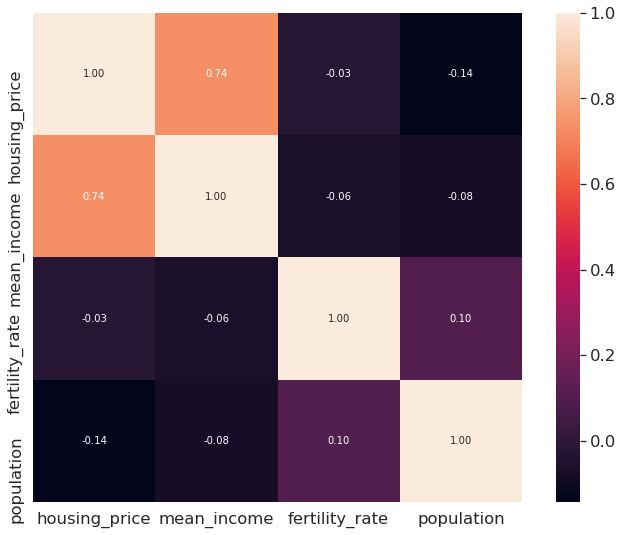

In [47]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [48]:
df.corrwith(df.housing_price)

housing_price                                   1.0000000
mean_income                                     0.7358351
population                                     -0.1436953
fertility_rate                                 -0.0273763
dtype: float64

In [49]:
# forward selection
df_14 = df.loc[:,['housing_price', 'mean_income']]

model_14 = sm.formula.ols('housing_price ~ mean_income', df_14).fit()
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.72e-33
Time:                        12:40:17   Log-Likelihood:                -2537.0
No. Observations:                 189   AIC:                             5078.
Df Residuals:                     187   BIC:                             5084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.231e+05      6e+04     -7.050      0.000   -5.41e+05   -3.05e+05
mean_income    15.6578      1.054     14.860      0.000      13.579      17.736
==============================================================================
Omnibus:                      193.764   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5983.976
Skew:                           3.848   Prob(JB):                         0.00
Kurtosis:                      29.470   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
df_15 = df.loc[:,['housing_price', 'population']]

model_15 = sm.formula.ols('housing_price ~ population', df_15).fit()
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.943
Date:                Mon, 30 Jan 2023   Prob (F-statistic):             0.0485
Time:                        12:40:18   Log-Likelihood:                -2608.7
No. Observations:                 189   AIC:                             5221.
Df Residuals:                     187   BIC:                             5228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.925e+05   1.23e+05      5.630      0.000     4.5e+05    9.35e+05
population   -28.8995     14.554     -1.986      0.049     -57.612      -0.187
==============================================================================
Omnibus:                      139.056   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1371.549
Skew:                           2.748   Prob(JB):                    1.49e-298
Kurtosis:                      14.999   Cond. No.                     5.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
df_16 = df.loc[:,['housing_price', 'fertility_rate']]

model_16 = sm.formula.ols('housing_price ~ fertility_rate', df_16).fit()
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1403
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.708
Time:                        12:40:19   Log-Likelihood:                -2610.6
No. Observations:                 189   AIC:                             5225.
Df Residuals:                     187   BIC:                             5232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.833e+05   8.87e+04      5.447      0.000    3.08e+05    6.58e+05
fertility_rate  -478.9058   1278.768     -0.375      0.708   -3001.572    2043.760
==============================================================================
Omnibus:                      149.484   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1817.165
Skew:                           2.942   Prob(JB):                         0.00
Kurtosis:                      17.005   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df_17 = df.loc[:,['housing_price', 'mean_income','population']]

model_17 = sm.formula.ols('housing_price ~ mean_income + population', df_17).fit()
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.79e-33
Time:                        12:40:20   Log-Likelihood:                -2535.4
No. Observations:                 189   AIC:                             5077.
Df Residuals:                     186   BIC:                             5087.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.678e+05   1.06e+05     -2.526      0.012   -4.77e+05   -5.87e+04
mean_income    15.5143      1.051     14.764      0.000      13.441      17.587
population    -17.6066      9.932     -1.773      0.078     -37.200       1.987
==============================================================================
Omnibus:                      183.627   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4862.467
Skew:                           3.594   Prob(JB):                         0.00
Kurtosis:                      26.787   Cond. No.                     5.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
df_final5 = df.loc[:,['housing_price', 'mean_income']]

model_final5 = sm.formula.ols('housing_price ~ mean_income', df_final5).fit()
model_final5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.72e-33
Time:                        12:40:20   Log-Likelihood:                -2537.0
No. Observations:                 189   AIC:                             5078.
Df Residuals:                     187   BIC:                             5084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.231e+05      6e+04     -7.050      0.000   -5.41e+05   -3.05e+05
mean_income    15.6578      1.054     14.860      0.000      13.579      17.736
==============================================================================
Omnibus:                      193.764   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5983.976
Skew:                           3.848   Prob(JB):                         0.00
Kurtosis:                      29.470   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# backward selection
df_18 = df.loc[:,['housing_price', 'mean_income','population']]

model_18 = sm.formula.ols('housing_price ~ mean_income + population', df_18).fit()
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.79e-33
Time:                        12:40:21   Log-Likelihood:                -2535.4
No. Observations:                 189   AIC:                             5077.
Df Residuals:                     186   BIC:                             5087.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.678e+05   1.06e+05     -2.526      0.012   -4.77e+05   -5.87e+04
mean_income    15.5143      1.051     14.764      0.000      13.441      17.587
population    -17.6066      9.932     -1.773      0.078     -37.200       1.987
==============================================================================
Omnibus:                      183.627   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4862.467
Skew:                           3.594   Prob(JB):                         0.00
Kurtosis:                      26.787   Cond. No.                     5.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
df_19 = df.loc[:,['housing_price', 'mean_income']]

model_19 = sm.formula.ols('housing_price ~ mean_income', df_19).fit()
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.72e-33
Time:                        12:40:24   Log-Likelihood:                -2537.0
No. Observations:                 189   AIC:                             5078.
Df Residuals:                     187   BIC:                             5084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.231e+05      6e+04     -7.050      0.000   -5.41e+05   -3.05e+05
mean_income    15.6578      1.054     14.860      0.000      13.579      17.736
==============================================================================
Omnibus:                      193.764   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5983.976
Skew:                           3.848   Prob(JB):                         0.00
Kurtosis:                      29.470   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
df_final6 = df.loc[:,['housing_price', 'mean_income']]

model_final6 = sm.formula.ols('housing_price ~ mean_income', df_final6).fit()
model_final6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.72e-33
Time:                        12:40:25   Log-Likelihood:                -2537.0
No. Observations:                 189   AIC:                             5078.
Df Residuals:                     187   BIC:                             5084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.231e+05      6e+04     -7.050      0.000   -5.41e+05   -3.05e+05
mean_income    15.6578      1.054     14.860      0.000      13.579      17.736
==============================================================================
Omnibus:                      193.764   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5983.976
Skew:                           3.848   Prob(JB):                         0.00
Kurtosis:                      29.470   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [58]:
df_final6 = drop_column_using_vif_(df_final6.drop('housing_price', axis=1))

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


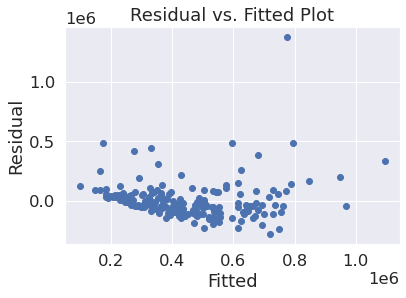

In [59]:
# plot 
plt.scatter(model_final6.fittedvalues, model_final6.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

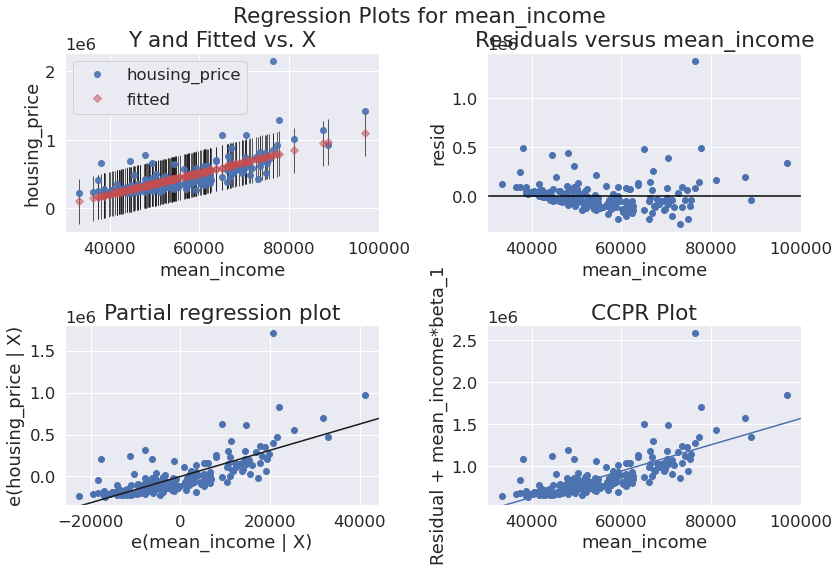

In [60]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final6, 'mean_income', fig=fig)

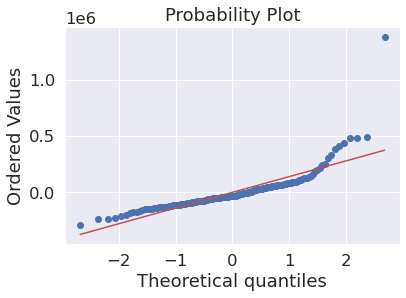

In [61]:
resid = model_final6.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

In [62]:
# west
df = pd.read_csv('west.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            211 non-null    object 
 1   MSOA            211 non-null    object 
 2   housing_price   211 non-null    int64  
 3   mean_income     211 non-null    int64  
 4   population      211 non-null    int64  
 5   fertility_rate  211 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 10.0+ KB


In [64]:
df.head()

,CODE,MSOA,housing_price,mean_income,population,fertility_rate
0,E02000093,Brent 001,345407,50800,11019,91.2000000
1,E02000094,Brent 002,325062,47900,8682,106.6000000
2,E02000095,Brent 003,359140,50000,10098,92.4000000
3,E02000096,Brent 004,448483,55800,7450,68.7000000
4,E02000097,Brent 005,352491,48400,9018,95.1000000


In [65]:
df.describe()

,housing_price,mean_income,population,fertility_rate
count,211.0000000,211.0000000,211.0000000,211.0000000
mean,"495,749.5165877","52,921.8009479","8,716.1090047",76.1734597
std,"263,399.0554099","9,322.5430098","1,761.3414348",16.9614397
min,"206,213.0000000","34,100.0000000","5,359.0000000",38.4000000
25%,"308,885.0000000","47,150.0000000","7,369.5000000",62.2000000
50%,"402,026.0000000","50,600.0000000","8,682.0000000",77.3000000
75%,"622,159.5000000","58,250.0000000","9,669.0000000",87.9000000
max,"1,531,666.0000000","84,800.0000000","15,476.0000000",115.7000000


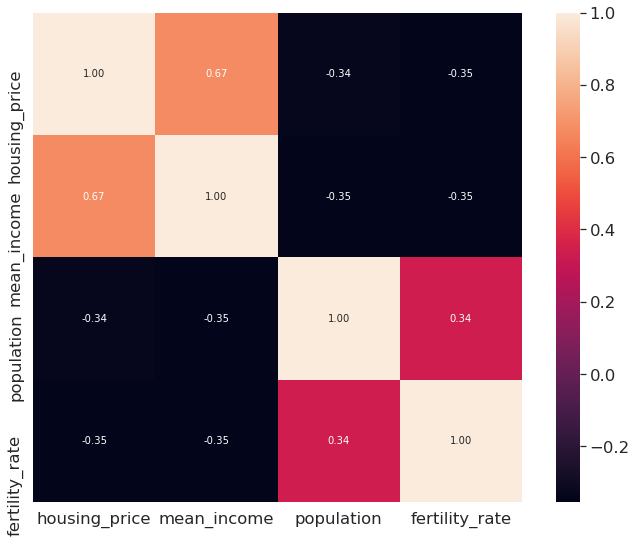

In [66]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [67]:
df.corrwith(df.housing_price)

housing_price                                   1.0000000
mean_income                                     0.6741418
population                                     -0.3372136
fertility_rate                                 -0.3534099
dtype: float64

In [68]:
# forward selection
df_20 = df.loc[:,['housing_price', 'mean_income']]

model_20 = sm.formula.ols('housing_price ~ mean_income', df_20).fit()
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.56e-29
Time:                        12:40:49   Log-Likelihood:                -2868.5
No. Observations:                 211   AIC:                             5741.
Df Residuals:                     209   BIC:                             5748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.123e+05   7.76e+04     -6.604      0.000   -6.65e+05   -3.59e+05
mean_income    19.0472      1.444     13.195      0.000      16.202      21.893
==============================================================================
Omnibus:                       60.579   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.097
Skew:                           1.412   Prob(JB):                     1.38e-26
Kurtosis:                       5.360   Cond. No.                     3.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
df_21 = df.loc[:,['housing_price', 'population']]

model_21 = sm.formula.ols('housing_price ~ population', df_21).fit()
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     26.82
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           5.25e-07
Time:                        12:40:49   Log-Likelihood:                -2919.7
No. Observations:                 211   AIC:                             5843.
Df Residuals:                     209   BIC:                             5850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.353e+05   8.66e+04     10.802      0.000    7.65e+05    1.11e+06
population   -50.4285      9.738     -5.178      0.000     -69.626     -31.231
==============================================================================
Omnibus:                       71.380   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.906
Skew:                           1.591   Prob(JB):                     1.89e-35
Kurtosis:                       5.838   Cond. No.                     4.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
df_22 = df.loc[:,['housing_price', 'fertility_rate']]

model_22 = sm.formula.ols('housing_price ~ fertility_rate', df_22).fit()
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     29.83
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.33e-07
Time:                        12:40:50   Log-Likelihood:                -2918.4
No. Observations:                 211   AIC:                             5841.
Df Residuals:                     209   BIC:                             5848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.138e+05   7.84e+04     11.654      0.000    7.59e+05    1.07e+06
fertility_rate -5488.2032   1004.865     -5.462      0.000   -7469.173   -3507.234
==============================================================================
Omnibus:                       84.292   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.176
Skew:                           1.769   Prob(JB):                     2.33e-51
Kurtosis:                       6.741   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
df_23 = df.loc[:,['housing_price', 'mean_income','population']]

model_23 = sm.formula.ols('housing_price ~ mean_income + population', df_23).fit()
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     90.70
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.77e-29
Time:                        12:40:51   Log-Likelihood:                -2866.3
No. Observations:                 211   AIC:                             5739.
Df Residuals:                     208   BIC:                             5749.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.038e+05   1.25e+05     -2.422      0.016   -5.51e+05   -5.65e+04
mean_income    17.9137      1.530     11.710      0.000      14.898      20.930
population    -17.0351      8.097     -2.104      0.037     -32.998      -1.072
==============================================================================
Omnibus:                       62.455   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.390
Skew:                           1.427   Prob(JB):                     1.32e-28
Kurtosis:                       5.541   Cond. No.                     5.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
df_24 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_24 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_24).fit()
model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     92.30
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.03e-29
Time:                        12:40:51   Log-Likelihood:                -2865.5
No. Observations:                 211   AIC:                             5737.
Df Residuals:                     208   BIC:                             5747.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.838e+05    1.2e+05     -2.372      0.019    -5.2e+05   -4.79e+04
mean_income       17.7233      1.522     11.643      0.000      14.722      20.724
fertility_rate -2079.3158    836.647     -2.485      0.014   -3728.710    -429.921
==============================================================================
Omnibus:                       61.740   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.173
Skew:                           1.393   Prob(JB):                     5.41e-29
Kurtosis:                       5.655   Cond. No.                     4.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
df_25 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_25 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_25).fit()
model_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     62.77
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.66e-29
Time:                        12:40:52   Log-Likelihood:                -2864.2
No. Observations:                 211   AIC:                             5736.
Df Residuals:                     207   BIC:                             5750.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.616e+05   1.43e+05     -1.132      0.259   -4.43e+05     1.2e+05
mean_income       17.0716      1.574     10.849      0.000      13.969      20.174
fertility_rate -1752.7697    859.686     -2.039      0.043   -3447.632     -57.907
population       -12.9193      8.286     -1.559      0.120     -29.255       3.417
==============================================================================
Omnibus:                       63.541   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.592
Skew:                           1.415   Prob(JB):                     8.04e-31
Kurtosis:                       5.785   Cond. No.                     5.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
df_final7 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_final7 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_final7).fit()
model_final7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     92.30
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.03e-29
Time:                        12:40:53   Log-Likelihood:                -2865.5
No. Observations:                 211   AIC:                             5737.
Df Residuals:                     208   BIC:                             5747.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.838e+05    1.2e+05     -2.372      0.019    -5.2e+05   -4.79e+04
mean_income       17.7233      1.522     11.643      0.000      14.722      20.724
fertility_rate -2079.3158    836.647     -2.485      0.014   -3728.710    -429.921
==============================================================================
Omnibus:                       61.740   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.173
Skew:                           1.393   Prob(JB):                     5.41e-29
Kurtosis:                       5.655   Cond. No.                     4.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# backward
df_26 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_26 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_26).fit()
model_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     62.77
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.66e-29
Time:                        12:40:54   Log-Likelihood:                -2864.2
No. Observations:                 211   AIC:                             5736.
Df Residuals:                     207   BIC:                             5750.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.616e+05   1.43e+05     -1.132      0.259   -4.43e+05     1.2e+05
mean_income       17.0716      1.574     10.849      0.000      13.969      20.174
fertility_rate -1752.7697    859.686     -2.039      0.043   -3447.632     -57.907
population       -12.9193      8.286     -1.559      0.120     -29.255       3.417
==============================================================================
Omnibus:                       63.541   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.592
Skew:                           1.415   Prob(JB):                     8.04e-31
Kurtosis:                       5.785   Cond. No.                     5.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
df_27 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_27 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_27).fit()
model_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     92.30
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.03e-29
Time:                        12:40:55   Log-Likelihood:                -2865.5
No. Observations:                 211   AIC:                             5737.
Df Residuals:                     208   BIC:                             5747.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.838e+05    1.2e+05     -2.372      0.019    -5.2e+05   -4.79e+04
mean_income       17.7233      1.522     11.643      0.000      14.722      20.724
fertility_rate -2079.3158    836.647     -2.485      0.014   -3728.710    -429.921
==============================================================================
Omnibus:                       61.740   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.173
Skew:                           1.393   Prob(JB):                     5.41e-29
Kurtosis:                       5.655   Cond. No.                     4.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
df_final8 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_final8 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_final8).fit()
model_final8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     92.30
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.03e-29
Time:                        12:40:56   Log-Likelihood:                -2865.5
No. Observations:                 211   AIC:                             5737.
Df Residuals:                     208   BIC:                             5747.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.838e+05    1.2e+05     -2.372      0.019    -5.2e+05   -4.79e+04
mean_income       17.7233      1.522     11.643      0.000      14.722      20.724
fertility_rate -2079.3158    836.647     -2.485      0.014   -3728.710    -429.921
==============================================================================
Omnibus:                       61.740   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.173
Skew:                           1.393   Prob(JB):                     5.41e-29
Kurtosis:                       5.655   Cond. No.                     4.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [79]:
df_final8 = drop_column_using_vif_(df_final8.drop('housing_price', axis=1))

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


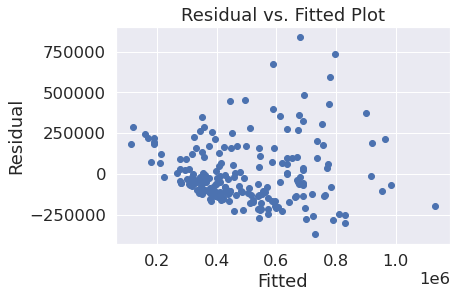

In [80]:
# plot 
plt.scatter(model_final8.fittedvalues, model_final8.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

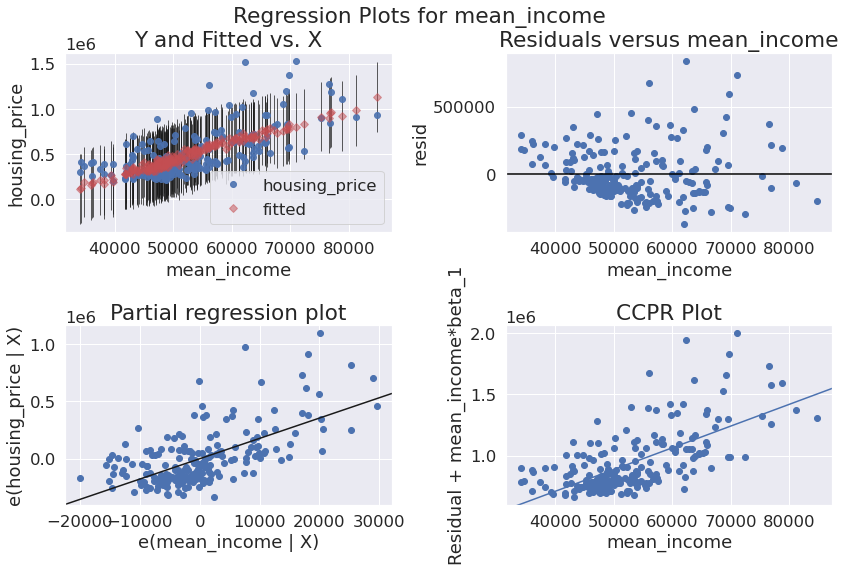

In [81]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final8, 'mean_income', fig=fig)

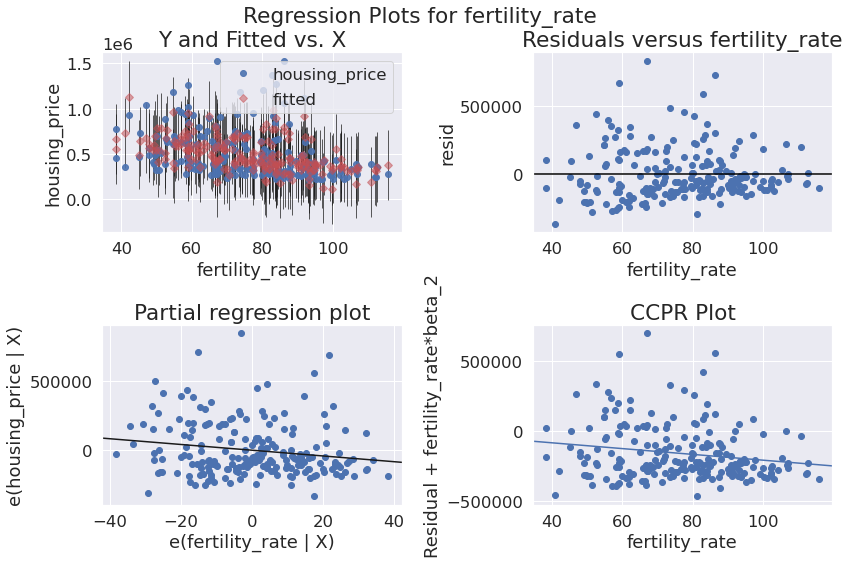

In [82]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final8, 'fertility_rate', fig=fig)

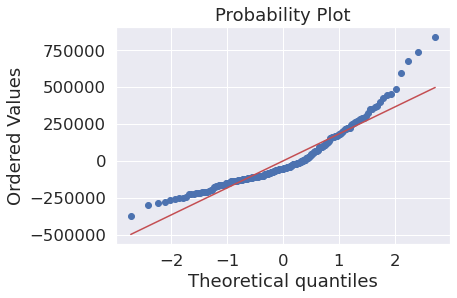

In [83]:
resid = model_final8.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

In [84]:
# north
df = pd.read_csv('north.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            113 non-null    object 
 1   MSOA            113 non-null    object 
 2   housing_price   113 non-null    int64  
 3   mean_income     113 non-null    int64  
 4   population      113 non-null    int64  
 5   fertility_rate  113 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ KB


In [86]:
df.head()

,CODE,MSOA,housing_price,mean_income,population,fertility_rate
0,E02000024,Barnet 001,502060,63400,10813,56.1000000
1,E02000025,Barnet 002,380386,49900,8326,84.8000000
2,E02000026,Barnet 003,447380,54700,6586,66.7000000
3,E02000027,Barnet 004,385231,47000,9938,50.5000000
4,E02000028,Barnet 005,412947,55500,6544,63.3000000


In [87]:
df.describe()

,housing_price,mean_income,population,fertility_rate
count,113.0000000,113.0000000,113.0000000,113.0000000
mean,"462,205.7610619","49,235.3982301","8,557.7876106",76.8814159
std,"248,756.9637814","9,553.1401004","1,553.6275377",17.5073890
min,"197,446.0000000","32,000.0000000","5,683.0000000",44.4000000
25%,"305,808.0000000","42,600.0000000","7,363.0000000",65.6000000
50%,"392,137.0000000","48,600.0000000","8,329.0000000",74.5000000
75%,"537,663.0000000","55,500.0000000","9,520.0000000",85.9000000
max,"1,816,641.0000000","82,600.0000000","12,237.0000000",154.9000000


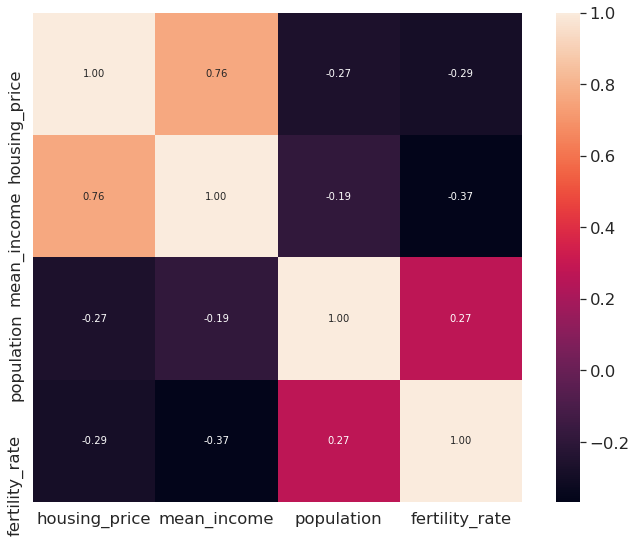

In [88]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [89]:
df.corrwith(df.housing_price)

housing_price                                   1.0000000
mean_income                                     0.7639830
population                                     -0.2658770
fertility_rate                                 -0.2906480
dtype: float64

In [90]:
# forward selection
df_28 = df.loc[:,['housing_price', 'mean_income']]

model_28 = sm.formula.ols('housing_price ~ mean_income', df_28).fit()
model_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     155.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           7.44e-23
Time:                        12:41:16   Log-Likelihood:                -1514.3
No. Observations:                 113   AIC:                             3033.
Df Residuals:                     111   BIC:                             3038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.173e+05      8e+04     -6.468      0.000   -6.76e+05   -3.59e+05
mean_income    19.8936      1.595     12.475      0.000      16.734      23.054
==============================================================================
Omnibus:                       69.526   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.966
Skew:                           2.155   Prob(JB):                     1.81e-68
Kurtosis:                       9.905   Cond. No.                     2.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
df_29 = df.loc[:,['housing_price', 'population']]

model_29 = sm.formula.ols('housing_price ~ population', df_29).fit()
model_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     8.444
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00442
Time:                        12:41:17   Log-Likelihood:                -1559.6
No. Observations:                 113   AIC:                             3123.
Df Residuals:                     111   BIC:                             3129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.265e+05   1.27e+05      6.487      0.000    5.74e+05    1.08e+06
population   -42.5705     14.650     -2.906      0.004     -71.601     -13.540
==============================================================================
Omnibus:                       85.826   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.937
Skew:                           2.572   Prob(JB):                    1.95e-131
Kurtosis:                      13.069   Cond. No.                     4.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
df_30 = df.loc[:,['housing_price', 'fertility_rate']]

model_30 = sm.formula.ols('housing_price ~ fertility_rate', df_30).fit()
model_30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     10.24
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00179
Time:                        12:41:17   Log-Likelihood:                -1558.8
No. Observations:                 113   AIC:                             3122.
Df Residuals:                     111   BIC:                             3127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.797e+05   1.02e+05      7.665      0.000    5.78e+05    9.81e+05
fertility_rate -4129.7250   1290.408     -3.200      0.002   -6686.755   -1572.695
==============================================================================
Omnibus:                       83.573   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.591
Skew:                           2.555   Prob(JB):                    4.92e-112
Kurtosis:                      12.097   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
df_31 = df.loc[:,['housing_price', 'mean_income','population']]

model_31 = sm.formula.ols('housing_price ~ mean_income + population', df_31).fit()
model_31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     82.15
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.50e-22
Time:                        12:41:18   Log-Likelihood:                -1512.2
No. Observations:                 113   AIC:                             3030.
Df Residuals:                     110   BIC:                             3038.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.142e+05   1.27e+05     -2.480      0.015   -5.65e+05   -6.31e+04
mean_income    19.2736      1.601     12.037      0.000      16.101      22.447
population    -20.1655      9.845     -2.048      0.043     -39.676      -0.655
==============================================================================
Omnibus:                       72.854   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.056
Skew:                           2.241   Prob(JB):                     4.82e-78
Kurtosis:                      10.452   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
df_32 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_32 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_32).fit()
model_32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     77.14
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.15e-21
Time:                        12:41:19   Log-Likelihood:                -1514.3
No. Observations:                 113   AIC:                             3035.
Df Residuals:                     110   BIC:                             3043.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.992e+05   1.31e+05     -3.813      0.000   -7.59e+05    -2.4e+05
mean_income       19.7831      1.722     11.487      0.000      16.370      23.196
fertility_rate  -164.0842    939.716     -0.175      0.862   -2026.381    1698.213
==============================================================================
Omnibus:                       69.376   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.704
Skew:                           2.150   Prob(JB):                     3.40e-68
Kurtosis:                       9.892   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
df_33 = df.loc[:,['housing_price', 'mean_income','population','fertility_rate']]

model_33 = sm.formula.ols('housing_price ~ mean_income + population + fertility_rate', df_33).fit()
model_33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     54.33
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.48e-21
Time:                        12:41:20   Log-Likelihood:                -1512.1
No. Observations:                 113   AIC:                             3032.
Df Residuals:                     109   BIC:                             3043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.373e+05   1.51e+05     -2.229      0.028   -6.37e+05   -3.74e+04
mean_income       19.4344      1.706     11.391      0.000      16.053      22.816
population       -20.7992     10.139     -2.051      0.043     -40.894      -0.704
fertility_rate   267.8515    949.933      0.282      0.779   -1614.886    2150.589
==============================================================================
Omnibus:                       73.008   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.414
Skew:                           2.246   Prob(JB):                     2.45e-78
Kurtosis:                      10.465   Cond. No.                     5.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
df_final9 = df.loc[:,['housing_price', 'mean_income','population']]

model_final9 = sm.formula.ols('housing_price ~ mean_income + population', df_final9).fit()
model_final9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     82.15
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.50e-22
Time:                        12:41:20   Log-Likelihood:                -1512.2
No. Observations:                 113   AIC:                             3030.
Df Residuals:                     110   BIC:                             3038.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.142e+05   1.27e+05     -2.480      0.015   -5.65e+05   -6.31e+04
mean_income    19.2736      1.601     12.037      0.000      16.101      22.447
population    -20.1655      9.845     -2.048      0.043     -39.676      -0.655
==============================================================================
Omnibus:                       72.854   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.056
Skew:                           2.241   Prob(JB):                     4.82e-78
Kurtosis:                      10.452   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
df_34 = df.loc[:,['housing_price', 'mean_income','population','fertility_rate']]

model_34 = sm.formula.ols('housing_price ~ mean_income + population + fertility_rate', df_34).fit()
model_34.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     54.33
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.48e-21
Time:                        12:41:21   Log-Likelihood:                -1512.1
No. Observations:                 113   AIC:                             3032.
Df Residuals:                     109   BIC:                             3043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.373e+05   1.51e+05     -2.229      0.028   -6.37e+05   -3.74e+04
mean_income       19.4344      1.706     11.391      0.000      16.053      22.816
population       -20.7992     10.139     -2.051      0.043     -40.894      -0.704
fertility_rate   267.8515    949.933      0.282      0.779   -1614.886    2150.589
==============================================================================
Omnibus:                       73.008   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.414
Skew:                           2.246   Prob(JB):                     2.45e-78
Kurtosis:                      10.465   Cond. No.                     5.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
df_35 = df.loc[:,['housing_price', 'mean_income','population']]

model_35 = sm.formula.ols('housing_price ~ mean_income + population', df_35).fit()
model_35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     82.15
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.50e-22
Time:                        12:41:21   Log-Likelihood:                -1512.2
No. Observations:                 113   AIC:                             3030.
Df Residuals:                     110   BIC:                             3038.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.142e+05   1.27e+05     -2.480      0.015   -5.65e+05   -6.31e+04
mean_income    19.2736      1.601     12.037      0.000      16.101      22.447
population    -20.1655      9.845     -2.048      0.043     -39.676      -0.655
==============================================================================
Omnibus:                       72.854   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.056
Skew:                           2.241   Prob(JB):                     4.82e-78
Kurtosis:                      10.452   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
df_final10 = df.loc[:,['housing_price', 'mean_income','population']]

model_final10 = sm.formula.ols('housing_price ~ mean_income + population', df_final10).fit()
model_final10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     82.15
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.50e-22
Time:                        12:41:22   Log-Likelihood:                -1512.2
No. Observations:                 113   AIC:                             3030.
Df Residuals:                     110   BIC:                             3038.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.142e+05   1.27e+05     -2.480      0.015   -5.65e+05   -6.31e+04
mean_income    19.2736      1.601     12.037      0.000      16.101      22.447
population    -20.1655      9.845     -2.048      0.043     -39.676      -0.655
==============================================================================
Omnibus:                       72.854   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.056
Skew:                           2.241   Prob(JB):                     4.82e-78
Kurtosis:                      10.452   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [101]:
df_final10 = drop_column_using_vif_(df_final10.drop('housing_price', axis=1))

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


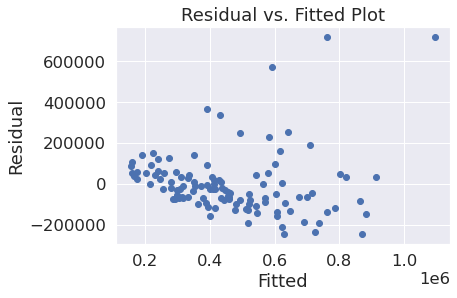

In [102]:
# plot 
plt.scatter(model_final10.fittedvalues, model_final10.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

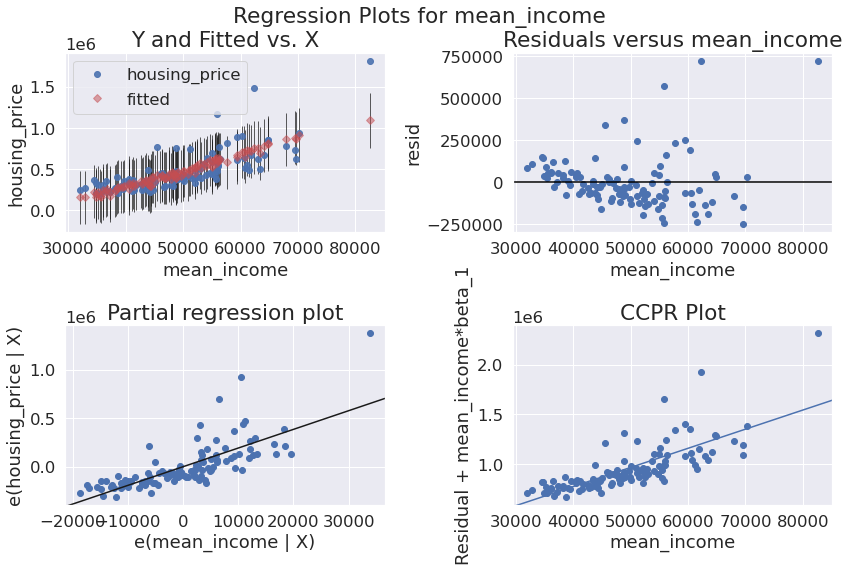

In [103]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final10, 'mean_income', fig=fig)

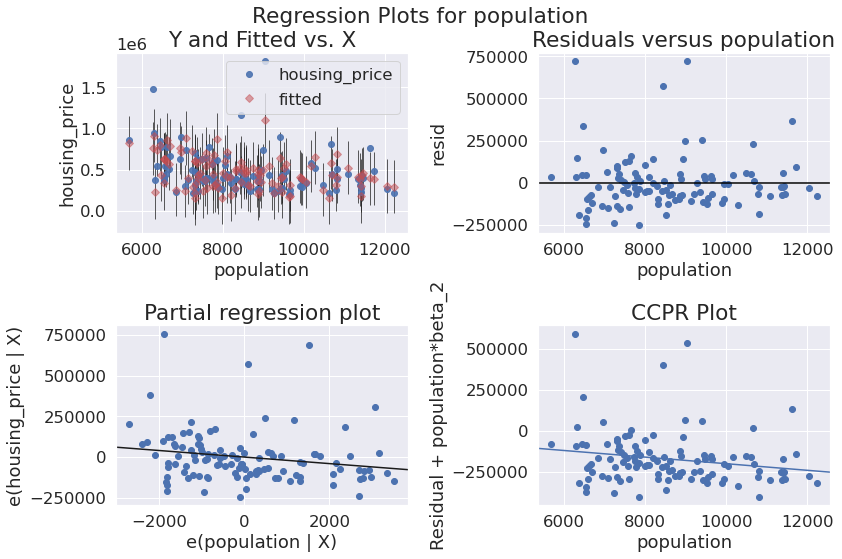

In [104]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final10, 'population', fig=fig)

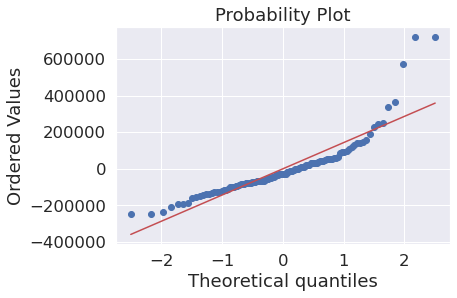

In [105]:
resid = model_final10.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()